## Data visualisation for predictive analytics

Data visualisation can be performed in many ways. There are infinite ways to visualise the data, and what works is dependent on the patterns in the data. In this post, we are trying to categorise the visualisation of data for regression and classification problems.  

Every regression, classification and clustering problem has some or all of the following assumptions:
1. Change in independent variables changes the dependent variable. In other words, there is a relationship between the dependent variable and the independent variables. Before building a model, it is advised to visualise this relationship.  
2. Assumptions on the distribution of the dependent or independent variable. For example, for Naive Bayes classifier, the independent variables should follow a normal distribution.  
3. Assumptions of relationships between independent variables. For example, for linear regression, the independent variables should not be correlated.  
4. Unbalanced dataset. The frequency of the smaller class should be significant when compared to the frequency of the larger class.  
5. The time series of data/features are stationary.  
  
Apart from validating the assumptions and identifying trends in the data, data visualisation can also be used for gathering insights and feature engineering.  

The below example is from the marketing department of a consulting firm. The problem is to identify the projects that they can win.

In [1]:
# Ignore future deprecation warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Importing the necessary libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
%matplotlib inline

In [2]:
# loading the data
path="data/marketing dept.csv"
df = pd.read_csv(path)
df.head()

,reporting_status,product,industry,region,strength_in_segment,profit_for_customer,sales_value,profit_perc,joint_bid_portion
0,Lost,F,Cap,Oth,57,1.225,6.5,64,59
1,Lost,L,Def,UK,51,1.469,9.9,56,58
2,Lost,Lo,Cli,UK,79,0.887,7.0,59,48
3,Lost,G,Fin,UK,55,1.316,8.9,34,41
4,Won,G,Sec,UK,32,1.010,5.7,43,63


## Univariate analysis
The univariate analysis deals with EDA on one variable alone. In describing or characterising the observations of an individual variable, three basic properties are of interest:  
1. The location of observations and how large or small the values of the individual observations are  
2. The dispersion (sometimes called scale or spread) of the observations  
3. The distribution of the observations  

Uni-variate plots provide one way to find out about those properties. There are two basic kinds of univariate plots:  
1. Enumeration plots, or plots that show every observation  
2. Summary plots that generalise the data into a simplified representation  
3. Enumerative plots  

### Index Plot/Univariate Scatter Diagram
The most common enumerative plot is the index plot. It displays the values of a single variable for each observation using symbols plotted relative to the observation number.  

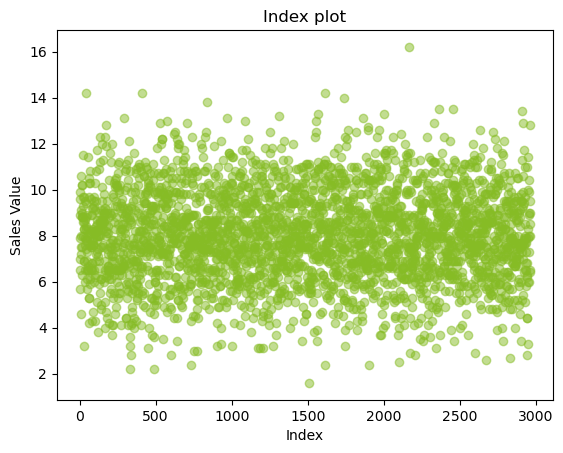

In [3]:
plt.plot(df.sales_value, 'o', color='#86BC25', alpha=0.5)
plt.title("Index plot")
plt.ylabel('Sales Value')
plt.xlabel('Index');

From the above plot, we can infer that there are around 3000 observations for sales, and they are captured randomly along the data.  

### Strip Plot/Strip Chart (univariate scatter diagram)
Displays the values of a single variable as symbols plotted along a line. This is a basic plot where we can see the spread of the data.

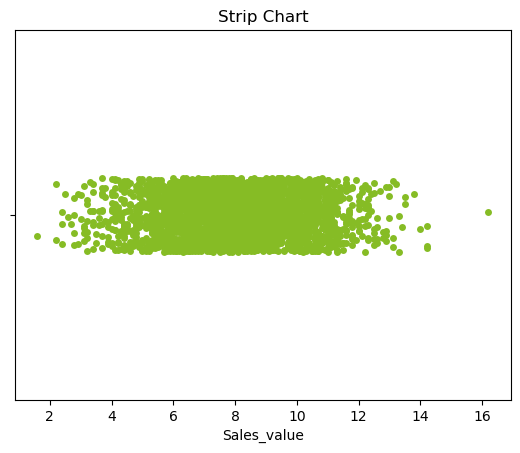

In [4]:
ax = sns.stripplot(x=df.sales_value, color='#86BC25')
ax.set(xlabel = 'Sales_value', title = 'Strip Chart');

### Dot Plot/Dot Chart
The dot plot displays the values plotted along a line. It is generally constructed after sorting the rows. This can help us in determining the distribution of the data. It can also help us identify the continuity of the data.

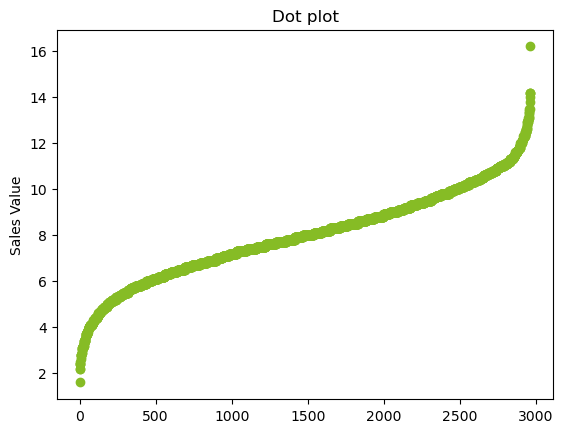

In [5]:
plt.plot(df.sort_values(by = 'sales_value').reset_index().sales_value, 'o', color='#86BC25')
plt.title("Dot plot")
plt.ylabel('Sales Value');

From looking at the plot, most of the data lies within 6-12 while the frequeny of the data decreases as we go away from the mean. The graph is also symmetric. This indicates the distribution could be Normal distribution.  

## Univariate Summary Plots
Summary plots display an object or a graph that gives a more concise expression of the location, dispersion, and distribution of a variable than an enumerative plot, but this comes at the expense of some loss of information: In a summary plot, it is no longer possible to retrieve the individual data value, but the gain usually matches this loss in understanding that results from the efficient representation of the data. Summary plots generally prove to be much better than enumerative plots in revealing the distribution of the data.   
### Box plot
A simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside to indicate the median value. The lower and upper quartiles are shown as horizontal lines on either side of the rectangle.  

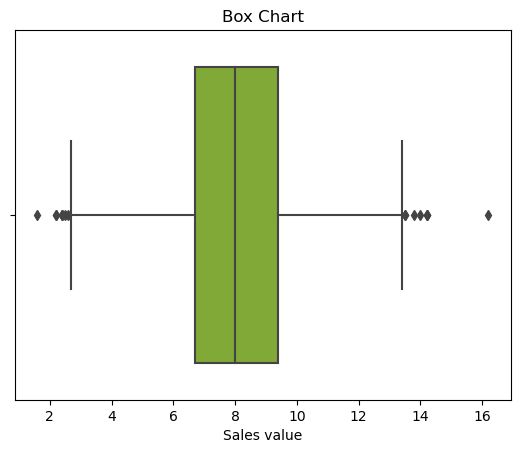

In [6]:
ax = sns.boxplot(x = df.sales_value, color='#86BC25')
ax.set(xlabel = 'Sales value', title = 'Box Chart');

### Histograms
The other summary plots are of various types:  

Histograms: Histograms are a type of bar chart that displays the counts or relative frequencies of values falling in different class intervals or ranges.  
Density Plots: A density plot is a plot of the local relative frequency or density of points along the number line or x-axis of a plot. Where points occur more frequently, this sum, and consequently the local density, will be greater.  

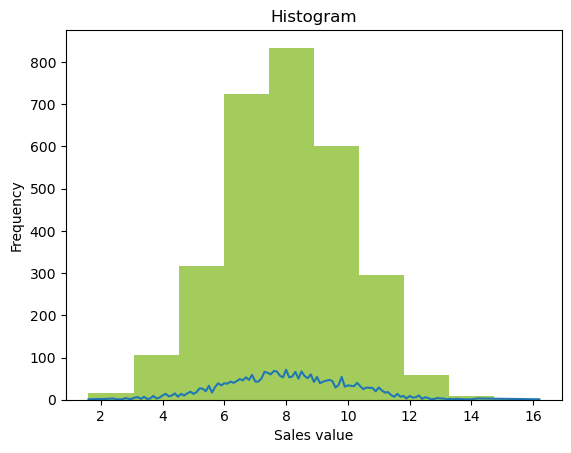

In [7]:
# For continuous data
ax = df.sales_value.plot.hist(alpha = 0.75, color='#86BC25')
df.groupby('sales_value')['sales_value'].count().plot()
ax.set(xlabel = 'Sales value', title = 'Histogram');

### Q-Q plot
In statistics, a Q-Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.  

If the two distributions being compared are similar, the points in the Q-Q plot will approximately lie on the line y = x. If the distributions are linearly related, the points in the Q-Q plot will approximately lie on a line, but not necessarily on the line y = x. Q-Q plots can also be used as a graphical means of estimating parameters in a location-scale family of distributions.  

A Q-Q plot is used to compare the shapes of distributions, providing a graphical view of how properties such as location, scale, and skewness are similar or different in the two distributions.  

Below is a Q-Q plot of the sales data with a normal distribution  

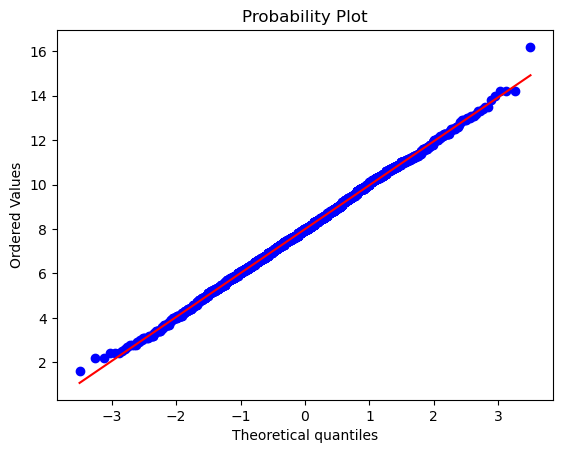

In [8]:
from scipy import stats
stats.probplot(df.sales_value, plot=sns.mpl.pyplot);

From the above plot, it is clear that the distribution is normal.  

### Bar chart
Whereas the above plots are applicable for continuous data, a simple bar chart can help us with categorical data.  

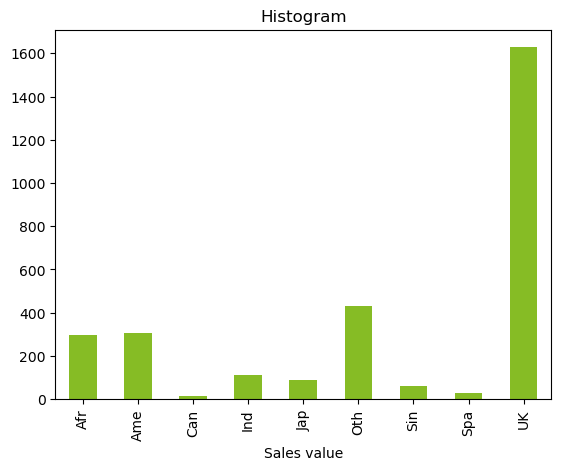

In [9]:
df.groupby('region')['region'].count().plot.bar(color='#86BC25').set(xlabel = 'Sales value', title = 'Histogram');

## Bivariate analysis

The bivariate analysis deals with visualisations between two variables. The bi-variate analysis is used to identify the relationship between dependent and independent variables. The dependent and independent variables can be of the following types:  

Problem       |     Independent var  |   Dependent var     |  Plot type  
--------------|----------------------|---------------------|---------------------------------
Classification|      Categorical     |     Categorical     |  Mosaic Plots, Stacked bar charts
Classification|      Continuous      |     Categorical     |  Joint histograms
Regression    |      Categorical     |     Continuous      |  Box charts
Regression    |      Continuous      |     Continuous      |  Scatter Plots

For all four types, we want to identify the relation between the dependent variable and the independent variables.    

### Classification Visualisations
First, let us consider the classification problem. Let's say we have to predict the reporting status of the bid. We have three categorical independent variables and five continuous independent variables.   

####  Joint Histograms
The five continuous variables are:   
1. Strength in the segment  
2. Profit for customer  
3. Sales Value  
4. Profit percentage  
5. joint bid portion  

For these variables, we can look at joint histograms. What we are trying to see is the overlap between the distributions for the two different classes. If the overlap between the two variables is small, then that variable can be a good predictor and vice versa.  

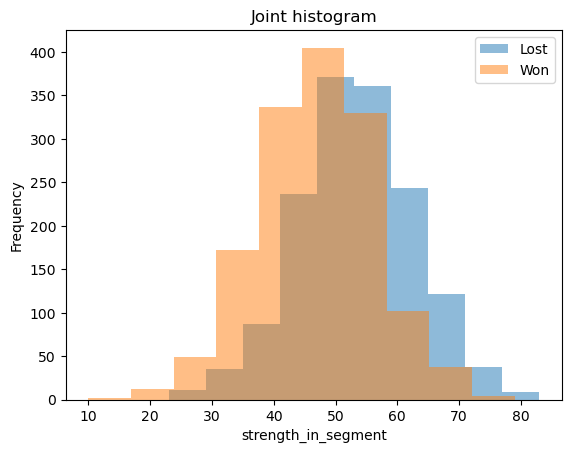

In [10]:
bi_con_cat = df.groupby(['reporting_status'])['strength_in_segment'].plot.hist(alpha = 0.5)
plt.xlabel('strength_in_segment')
plt.legend(df.groupby(['reporting_status'])['strength_in_segment'].count().axes[0].tolist())
plt.title('Joint histogram');

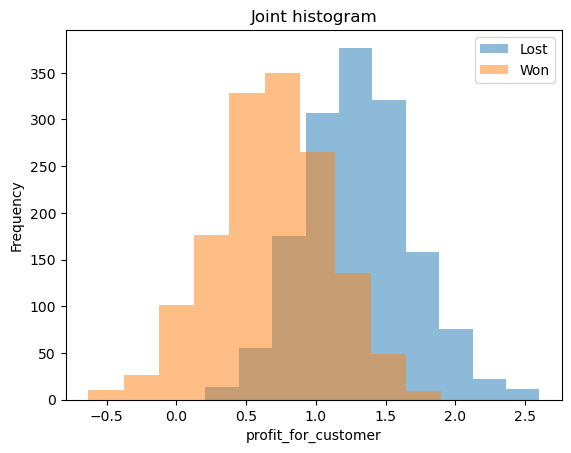

In [11]:
bi_con_cat = df.groupby(['reporting_status'])['profit_for_customer'].plot.hist(alpha = 0.5)
plt.xlabel('profit_for_customer')
plt.legend(df.groupby(['reporting_status'])['profit_for_customer'].count().axes[0].tolist())
plt.title('Joint histogram');

From the above graphs, we can see that profit for the customer can explain the status of the bid when compared to strength in the segment. We can also see the mean, variance and distributions of the independent variables between the classes.  

In a decision tree, the tree will split with profit_for_customer>1 as 'Lost' class and profit_for_customer<1 as 'Won'. In logistic regression, the pseudo $R^2$ will be greater for profit_for_customer than for strength_in_segment. Similar thinking can be applied to SVM, Naive-Bates classifiers etc.    

#### Mosaic Plots
The three categorical variables are:  
1. Product  
2. Industry  
3. Region  

For these variables, a mosaic plot will be useful. In the mosaic plot, the area of the rectangles is proportional to the frequency of the class. On the x-axis, we have the dependent variable, and in the y-axis, we have the independent variables. Using this, we can see the relative frequencies of the 'Won' and 'Lost' in each of the dependent variable classes.

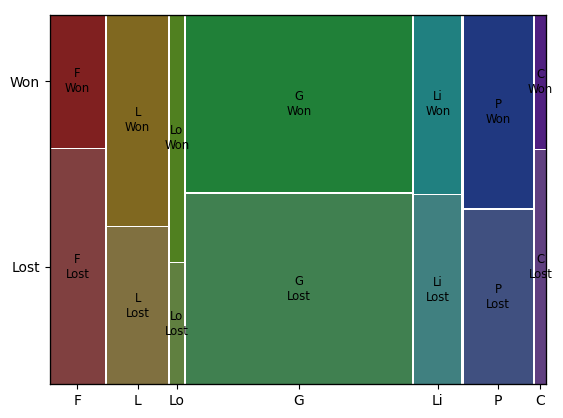

In [12]:
# from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['product', 'reporting_status']);

For example, the ratio of Lost to won cases is the same in products 'G', 'Li' and 'P'. Product 'F' has more wins than normal, while product 'L' has more losses than normal. The products 'C' and 'Lo' are too small to be statistically significant.  

Intuitively, in logistic regression, the products 'G', 'Li' and 'P' can be considered as base classes with 'F' having a positive slope value and 'L' having a negative slope value. In decision-trees, the products 'G', 'Li' and 'P' will be part of one branch while products 'L' and 'F' will be part of different branches. Similar thinking can be applied to SVM, Naive-Bates classifiers etc. 

### Regression Visualisations
Let us consider the regression problem. Let's say we have to predict sales_value of the successful bids. We have three categorical independent variables and four continuous independent variables.

In [13]:
successful_bids = df[df['reporting_status'] == 'Won']

#### Scatter plots
There are four continuous variables:  
1. Strength in the segment  
2. Profit for customer  
3. Profit percentage  
4. Joint bid portion    

Scatter plots show how much and how one variable is affected by another. We can use them to identify how changing the independent variable changes the dependent variable. Using this, we can identify if we have to do any transformations to the variables.  

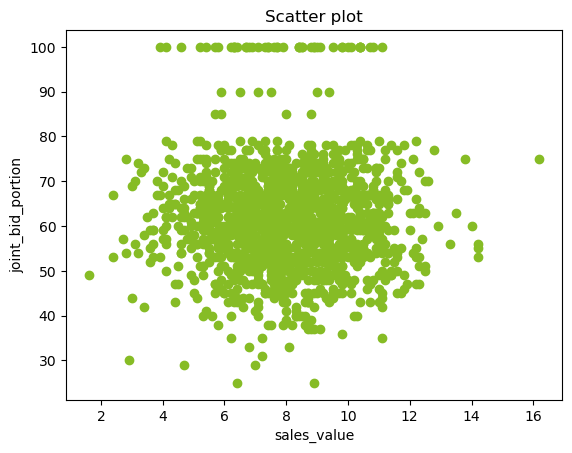

In [14]:
plt.scatter(successful_bids['sales_value'], successful_bids['joint_bid_portion'], color='#86BC25')
plt.ylabel('joint_bid_portion')
plt.xlabel('sales_value')
plt.title('Scatter plot');

In the above plot, there seems to be no relation between joint_bid_portion and sales_value. We can also observe how joint bid portion behaves after 80.  

#### Box plots
The three categorical variables are  
1. Product  
2. Industry  
3. Region  
For these variables, a box plot will be useful. While showing the relative means among the classes, we can also visualise the variations and distributions in the data.

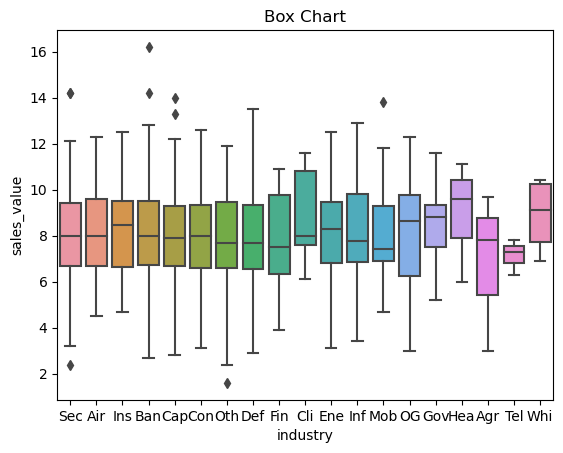

In [15]:
bi_variate_boxplot = sns.boxplot(x="industry", y="sales_value", data=successful_bids)
bi_variate_boxplot.set(title = 'Box Chart');

From the above plot, the mean of sales for 'Sec', 'Air, 'Ban', 'Cap', 'Con', 'Oth', 'Def' and 'Agr' are similar with similar distributions. The mean of 'Ins', 'OG', 'Gov', 'Hea' and 'Whi' classes seems to be higher and the mean of 'Mob', 'Fin' and 'Tel' is lower. In a linear regression, the following industries would be considered as base classes: 'Sec', 'Air, 'Ban', 'Cap', 'Con', 'Oth', 'Def' and 'Agr' while 'Ins', 'OG', 'Gov', 'Hea' and 'Whi' will have positive slope ($\beta$) value and 'Mob', 'Fin' and 'Tel' will have a negative slope.

## Generic EDA code
For any dataset, we can do the following basic univariate and bivariate analysis in one go.

### Combining the univariate analysis
The below function will do the following for all the columns in the dataset:  
1. For continuous data, it will plot the scatter plot, box plot, histogram and q-q plot with normal distribution  
2. For categorical data, it will plot the bar chart  and pie chart  

### Combining the bivariate classification analysis
The below code will do the following for all the columns in the dataset:  
1. For continuous data, it will plot the joint histograms    
2. For categorical data, it will plot the mosaic plot  

### Combining the bivariate regression analysis
The below code will do the following for all the columns in the dataset:  
1. For continuous data, it will plot the scatter plots    
2. For categorical data, it will plot the bar charts  

In [16]:
import matplotlib as mpl

# Set the default colors
my_colors_list = ['#007CB0', '#046A38', '#26890D', '#43B02A', '#86BC25', '#9DD4CF', '#0D8390']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=my_colors_list)

In [17]:
def univariate_analysis(dataset):
    # For catogorical data
    for i in (dataset.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns):
        print(i)
        # Plotting bar chart
        dataset.groupby(i)[i].count().plot.bar(ylabel='frequency')
        plt.show();
        
        # Plotting a pie chart
        # Steps:
        # 1. Create a count and percentage of each class
        # 2. When percentage is less than 5%, we are combining them with 'others'
        # 3. Plot pie chart
        dataset.groupby(i)[i].count().reset_index(name = 'count_').\
            assign(percentage = lambda df:df.count_/sum(df.count_)).\
            assign(y = lambda df: np.where(df.percentage>0.05, df[i], 'other')).\
            groupby('y')['count_'].sum().\
            plot.pie(legend=None, rotatelabels=True, autopct='%1.1f%%', ylabel = i,
                     wedgeprops=dict(width=.5))
        plt.show();
        print('-'*96)
        
    # For continuous data
    ## Selecting the columns that are continuous
    for i in (dataset.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns):
        print(i)
        
        # Plotting two plots one beside the other
        plt.subplot(121)
        # Plotting index plot
        plt.plot(dataset[i], 'o', alpha = 0.5)
        plt.ylabel(i)
        plt.xlabel('Index')
        plt.title(i+' charts')

        plt.subplot(122)
        # Plotting q-q plot
        stats.probplot(dataset[i], plot=sns.mpl.pyplot)
        plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
        plt.show();

        # Plotting Box chart
        plt.title(i+' box plot')
        ax = sns.boxplot(x = dataset[i])
        plt.show();
        
        # Plotting Histograms
        plt.title(i + ' histogram')
        ax2 = dataset[i].plot.hist(alpha = 0.75)
        dataset.groupby(i)[i].count().plot()
        plt.show();
        
        print('-'*96)

def plot_mosaics(data, x_col, y_col, title='', colors_list =[]):
    dict_of_tuples = {}
    
    # create the clean set of percentages to print
    for x_col_ in data[x_col].unique():
        for y_col_ in data[y_col].unique():
            n = len(data[(data[x_col]==x_col_)&(data[y_col]==y_col_)][x_col])
            d = len(data[(data[x_col]==x_col_)][x_col])
            len_ = len(data[x_col])
            if((d==0) or (n/d<=0.04)):
                # if the percentage within a class is less than 4%, do not print the percentage
                dict_of_tuples[(str(x_col_), str(y_col_))] = ''
            elif(n/len_<=0.02):
                # If its a tiny class with less than 2% of the total data, do not print
                dict_of_tuples[(str(x_col_), str(y_col_))] = ''
            else:
                dict_of_tuples[(str(x_col_), str(y_col_))] = str(int(n/d*100))+"%"
    
    dict_of_colors = dict_of_tuples.copy()
    if(len(colors_list)>0):
        # create a clean set of colors
        for i, x_col_ in enumerate(data[x_col].unique()):
            for y_col_ in data[y_col].unique():
                dict_of_colors[(str(x_col_), str(y_col_))] = {'color':colors_list[i], 'alpha':0.8}

    # Plot the mosaic plot
    labelizer = lambda k: dict_of_tuples[k]    
    fig, ax = plt.subplots(figsize=(8,6))
    if(len(colors_list)>0):
        mosaic(data.sort_values([x_col, y_col]), [x_col, y_col], 
               statistic = False, axes_label = True, label_rotation = [90, 0],
               labelizer=labelizer, properties=dict_of_colors, gap=0.008, ax=ax)
    else:
        mosaic(data.sort_values([x_col, y_col]), [x_col, y_col], 
               statistic = False, axes_label = True, label_rotation = [90, 0],
               labelizer=labelizer, gap=0.008, ax=ax)
    if(title==''):
        plt.title(str(y_col) + ' percentages across ' + str(x_col))
    else:
        plt.title(title)
    plt.show();

def classification_bivariate_analysis(dataset, dependent_variable, colors_list =[]):
    # For continuous data
    for i in (dataset.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns):
        bi_con_cat = dataset.groupby([dependent_variable])[i].plot.hist(alpha = 0.75)
        plt.xlabel(i)
        plt.legend(dataset.groupby([dependent_variable])[i].count().axes[0].tolist())
        plt.title(i)
        plt.show();

    # For catogorical data
    for i in (dataset.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns):
        if(i != dependent_variable):
            dict_of_tuples = {}
            plot_mosaics(dataset, i, dependent_variable, colors_list = colors_list)

def regression_bivariate_analysis(dataset, dependent_variable, colors_list = []):
    # For continuous data
    for i in (dataset.select_dtypes(include=['int', 'int64', 'float', 'float64']).columns):
        if(i != dependent_variable):
            plt.scatter(dataset[dependent_variable], dataset[i])
            plt.ylabel(i)
            plt.xlabel(dependent_variable)
            plt.title(i+' vs '+dependent_variable)
            plt.show();
    
    # For catogorical data
    for i in (dataset.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns):
        color_palette = {}
        colors_iter = iter(colors_list)
        if(len(colors_list)>0):
            for col_ in dataset[i].unique():
                color_palette[col_] = next(colors_iter)
        
            bi_variate_boxplot = sns.boxplot(x=i, y=dependent_variable, palette = color_palette, data=dataset)
            bi_variate_boxplot.set(title = i)
        else:
            bi_variate_boxplot = sns.boxplot(x=i, y=dependent_variable, data=dataset)
            bi_variate_boxplot.set(title = i)
        plt.show();

reporting_status


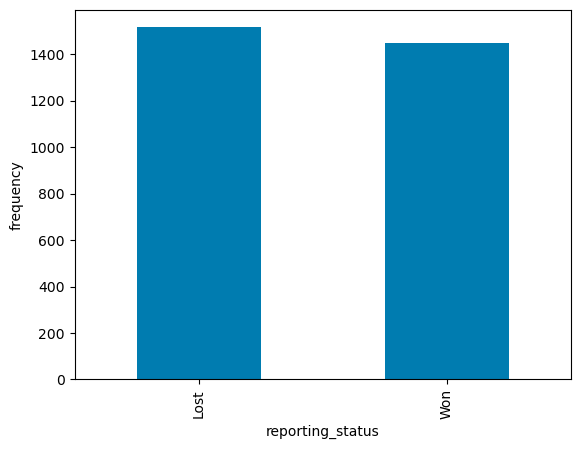

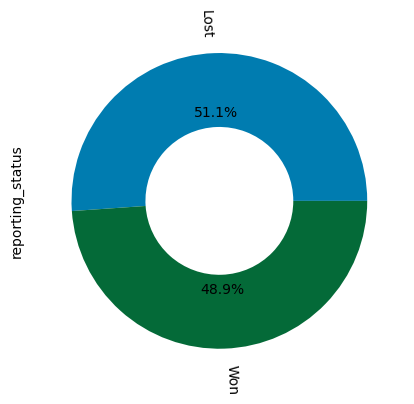

------------------------------------------------------------------------------------------------
product


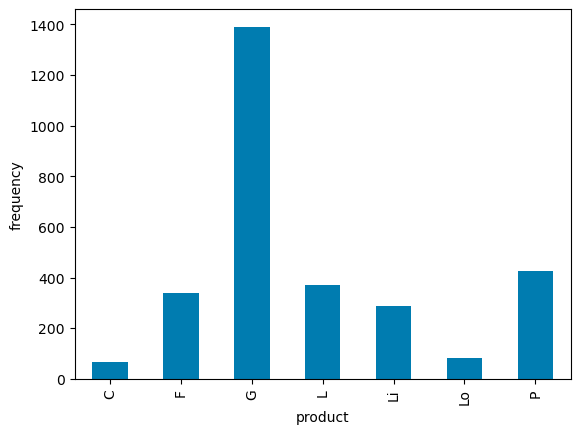

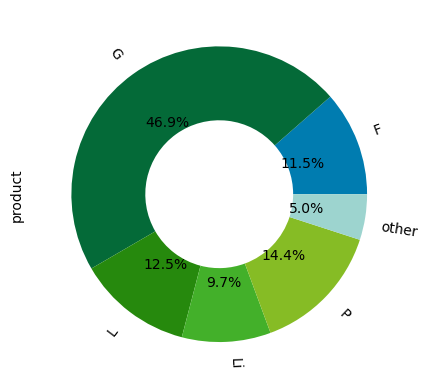

------------------------------------------------------------------------------------------------
industry


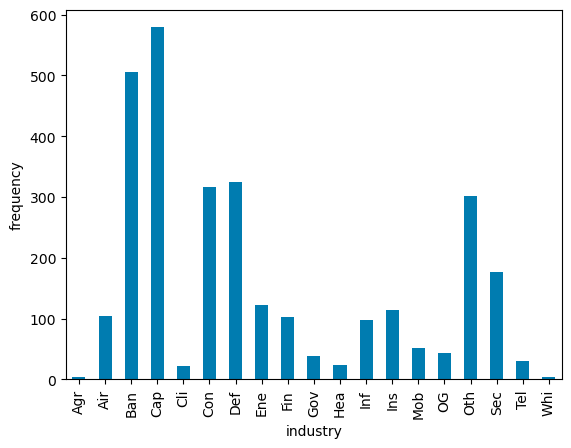

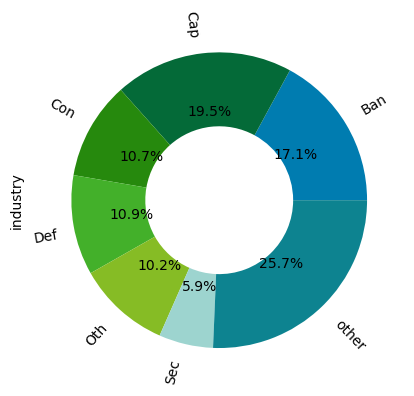

------------------------------------------------------------------------------------------------
region


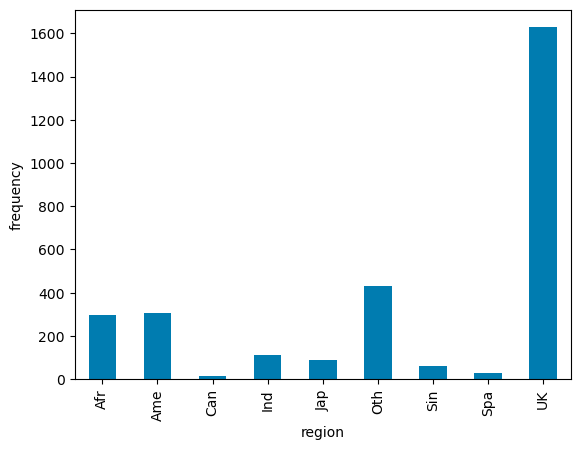

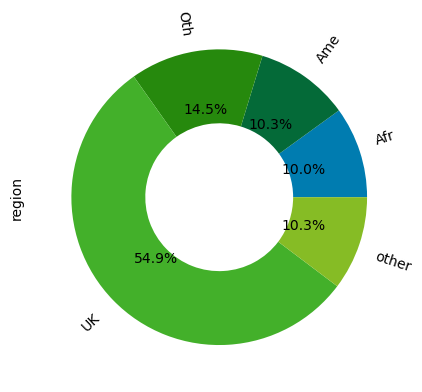

------------------------------------------------------------------------------------------------
strength_in_segment


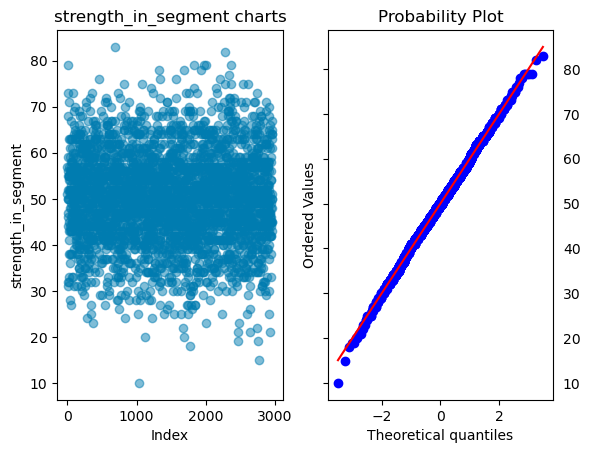

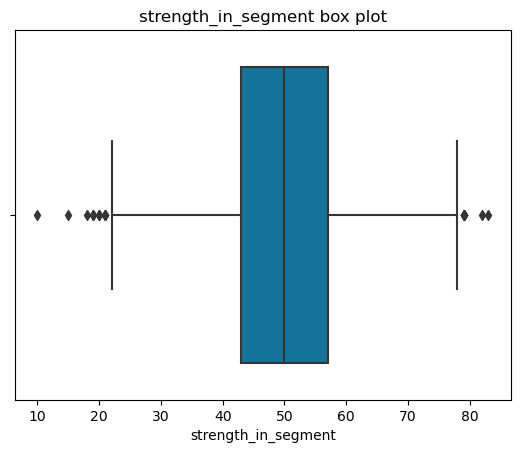

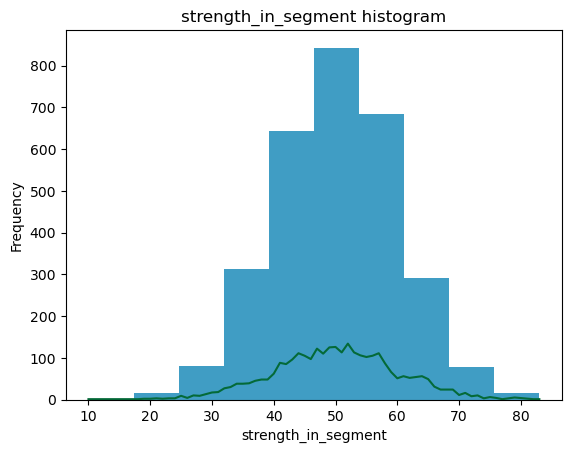

------------------------------------------------------------------------------------------------
profit_for_customer


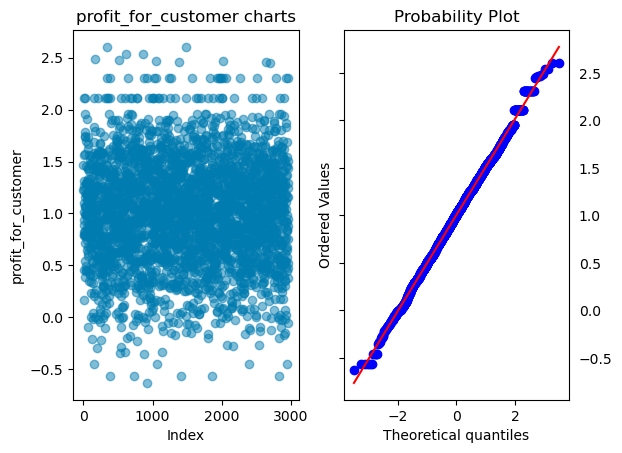

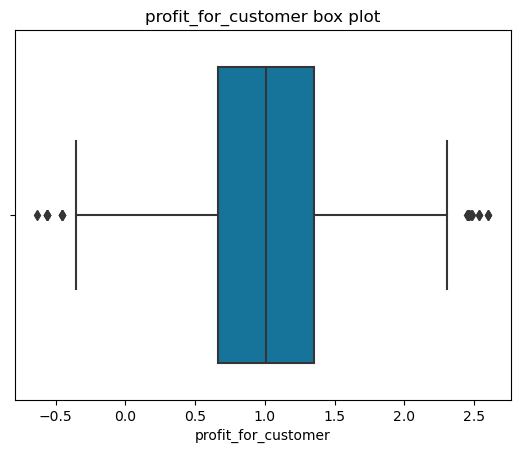

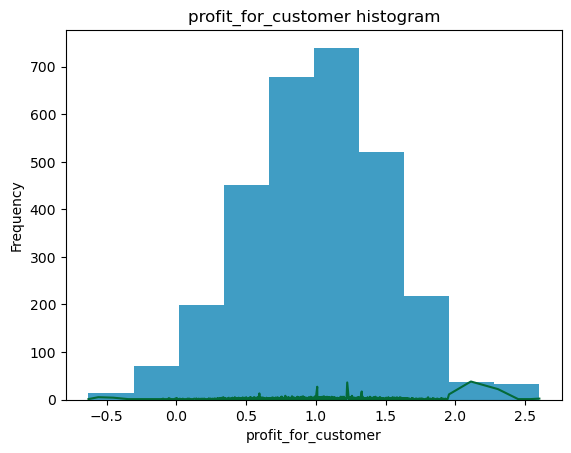

------------------------------------------------------------------------------------------------
sales_value


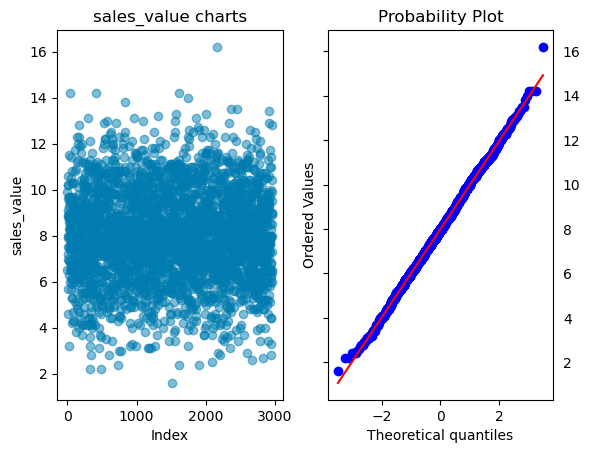

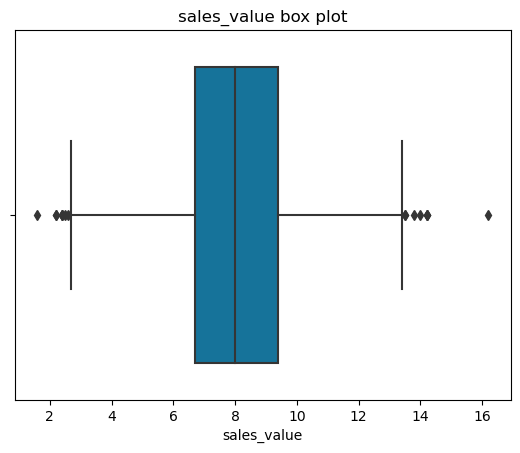

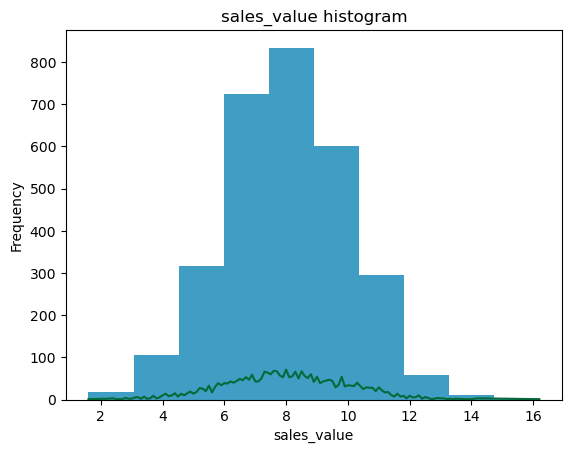

------------------------------------------------------------------------------------------------
profit_perc


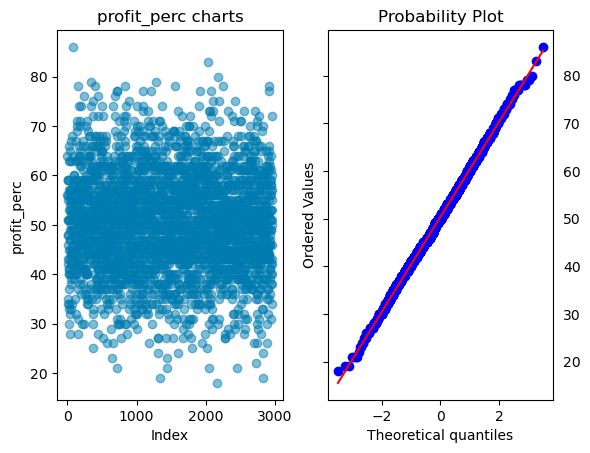

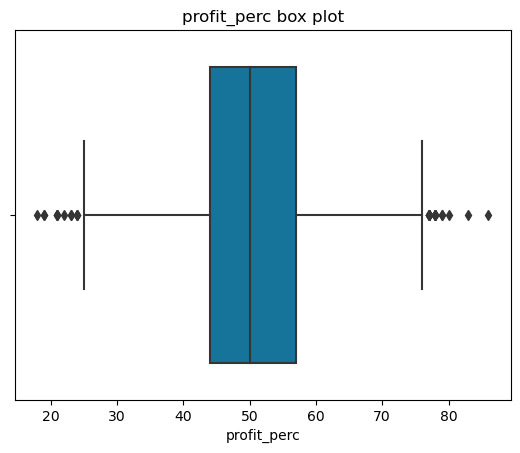

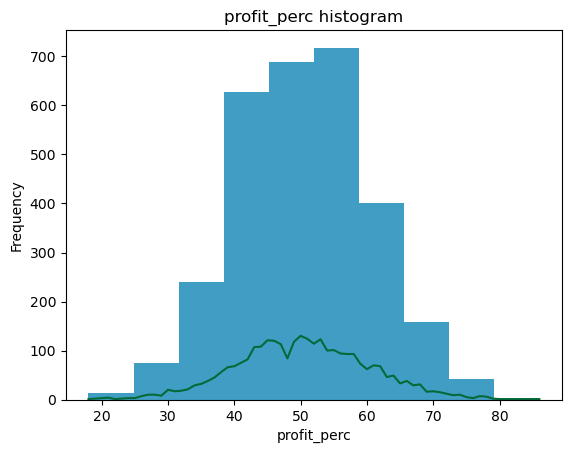

------------------------------------------------------------------------------------------------
joint_bid_portion


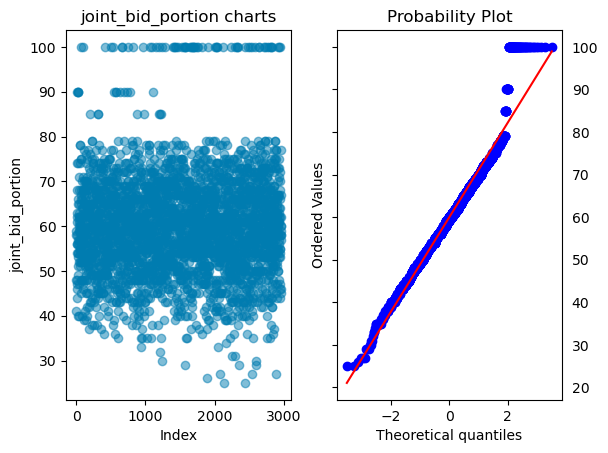

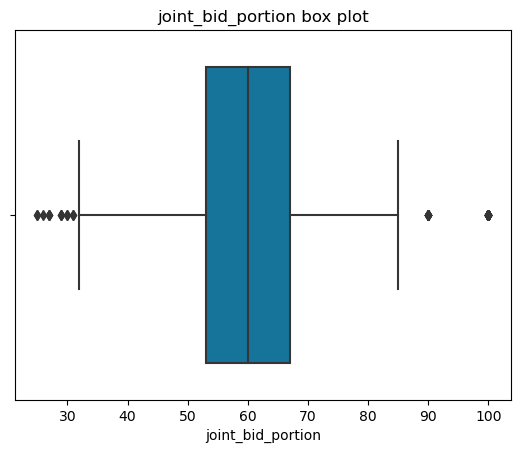

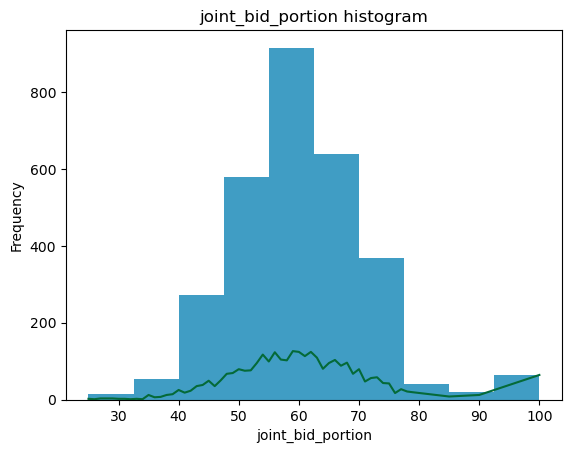

------------------------------------------------------------------------------------------------


In [18]:
univariate_analysis(df)

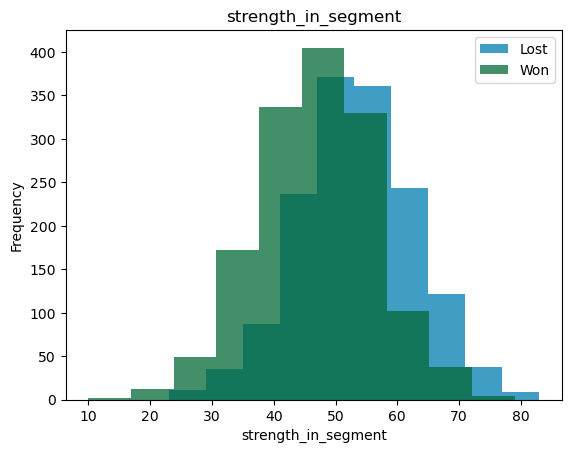

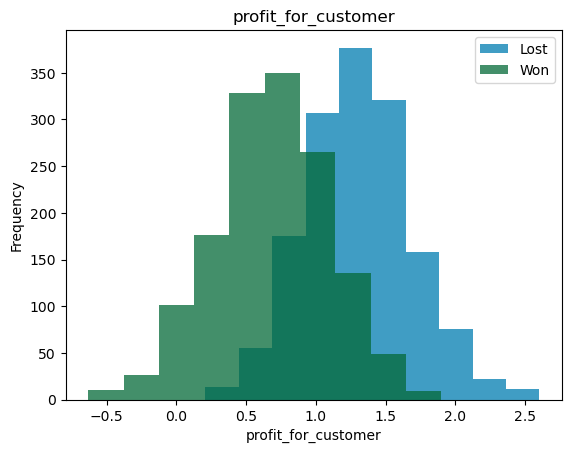

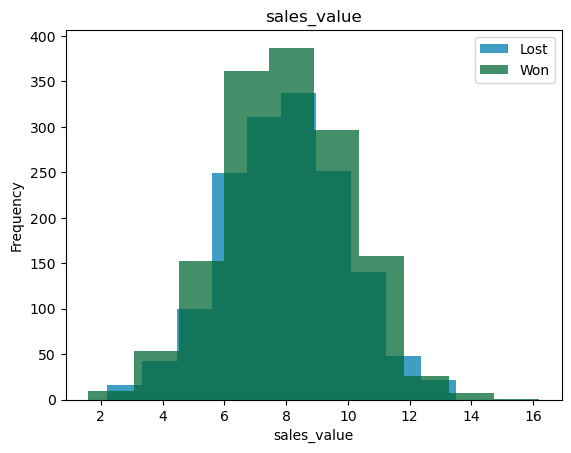

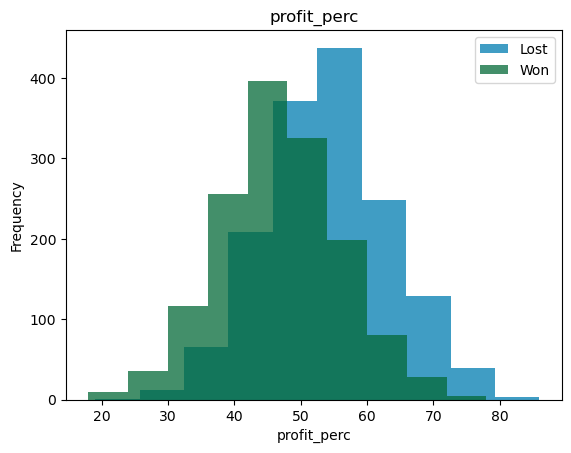

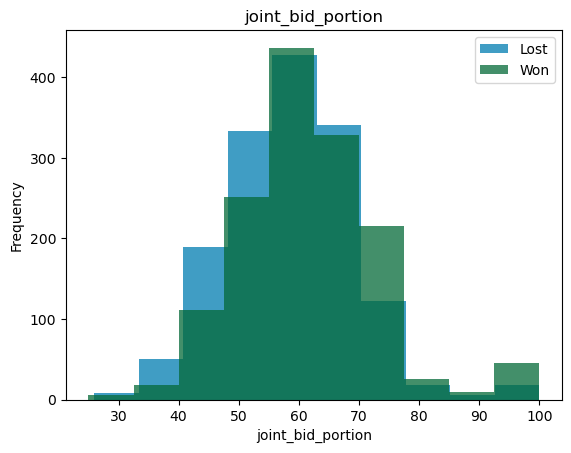

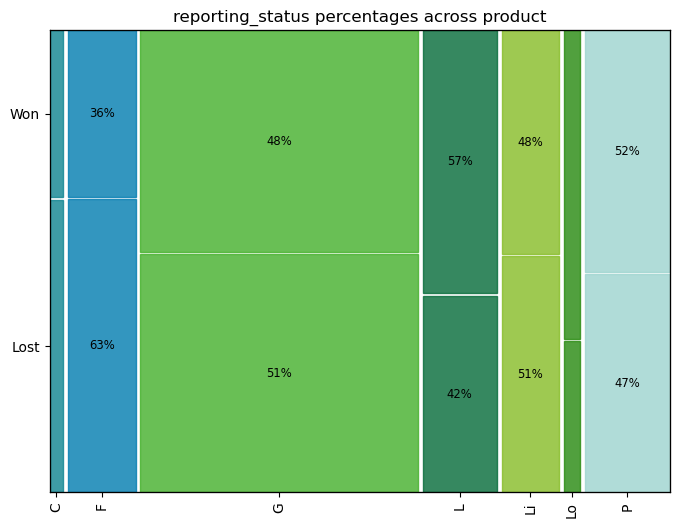

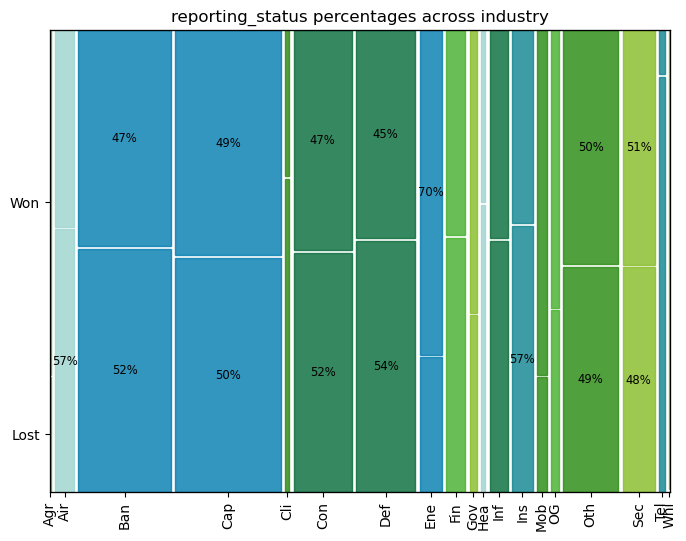

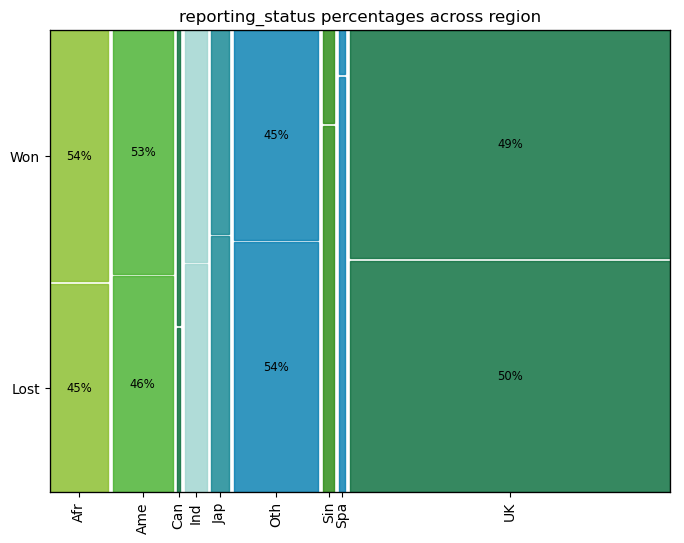

In [19]:
classification_bivariate_analysis(df, 'reporting_status', my_colors_list*15)

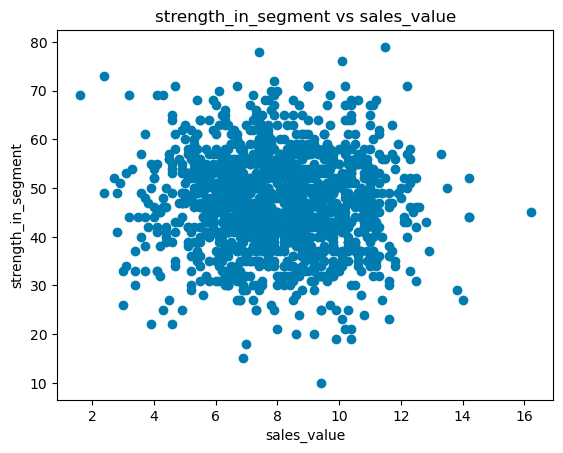

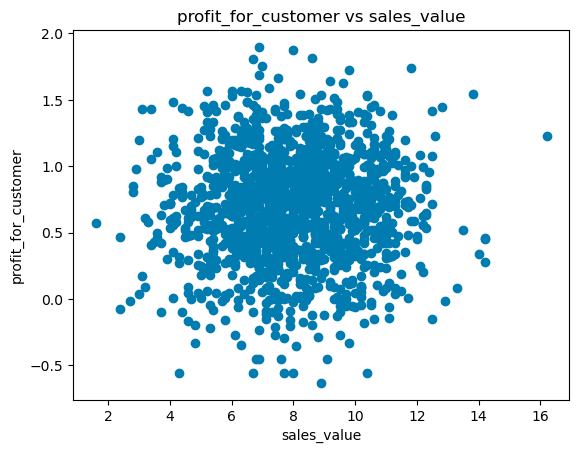

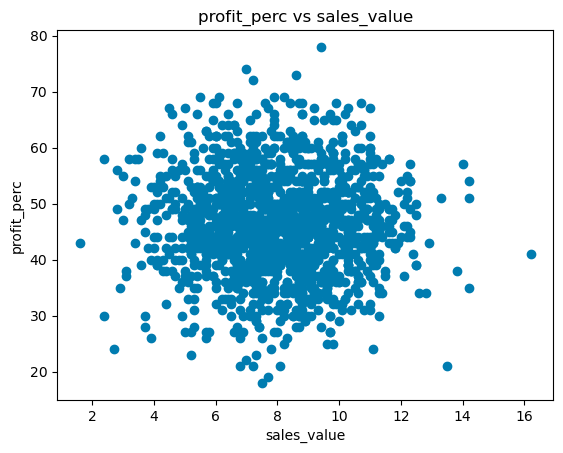

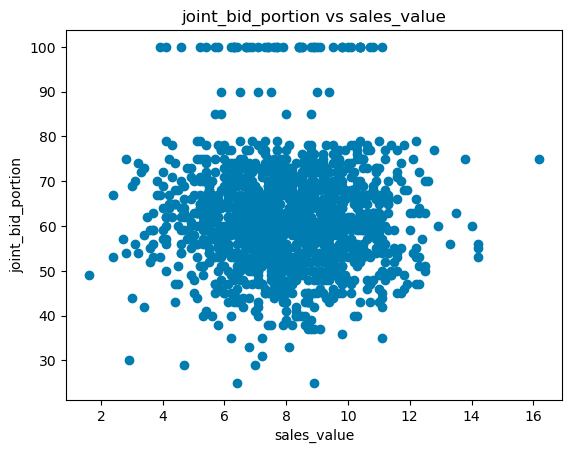

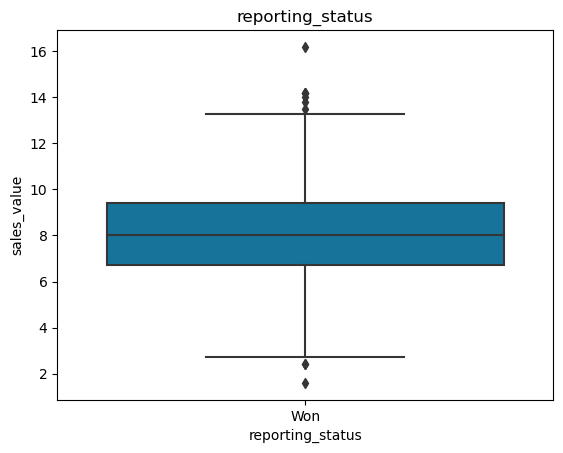

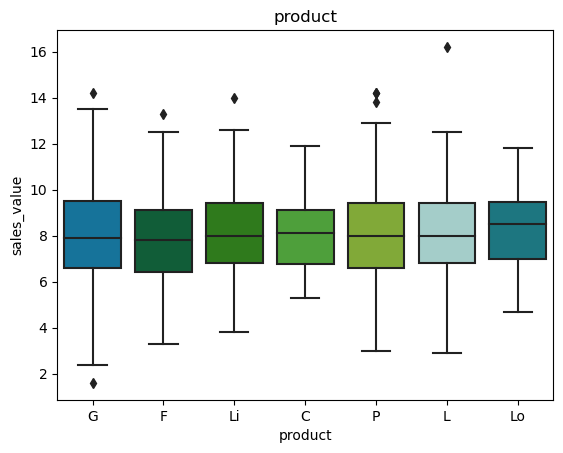

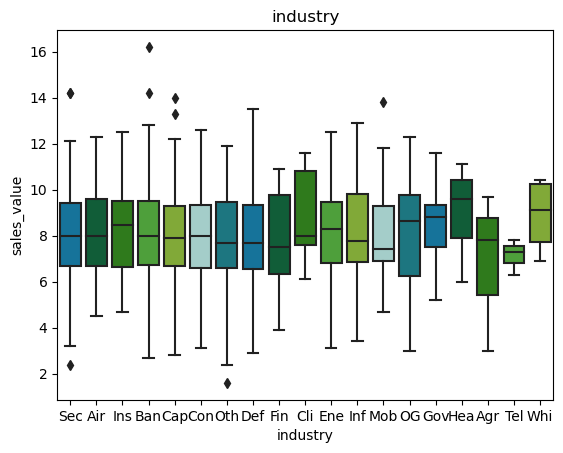

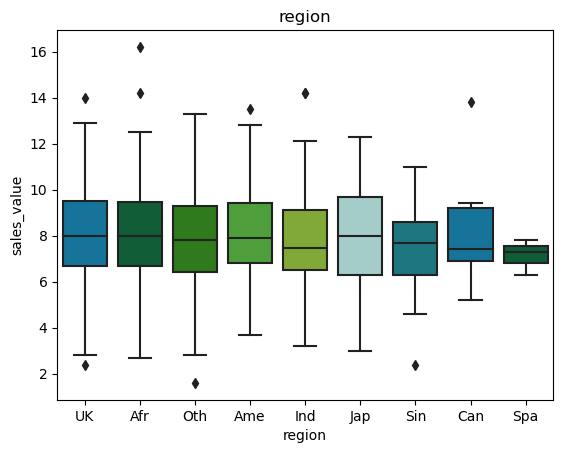

In [20]:
regression_bivariate_analysis(successful_bids, 'sales_value', my_colors_list*15)